In [23]:
import numpy as np

In [24]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [25]:
import matplotlib.pyplot as plt

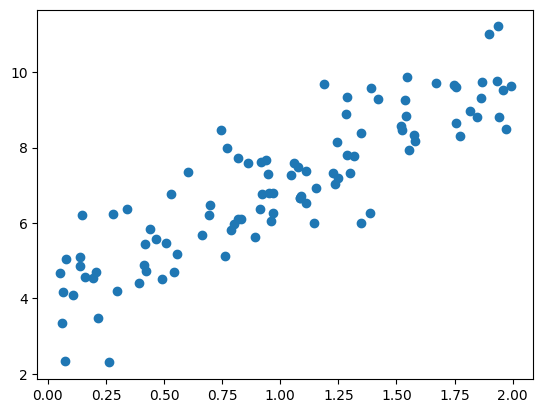

In [26]:
plt.scatter(x=X, y=y)

In [27]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [28]:
theta_best

array([[4.04566355],
       [2.9352078 ]])

(0.0, 2.0, 0.0, 15.0)

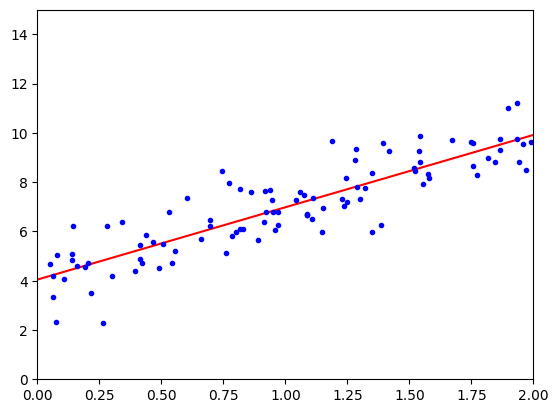

In [29]:
# Now make predictions with the theta_best
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2,0,15])

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.04566355]), array([[2.9352078]]))

In [31]:
lin_reg.predict(X_new)

array([[4.04566355],
       [9.91607916]])

In [32]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [33]:
theta_best_svd

array([[4.04566355],
       [2.9352078 ]])

In [34]:
np.linalg.pinv(X_b).dot(y)

array([[4.04566355],
       [2.9352078 ]])

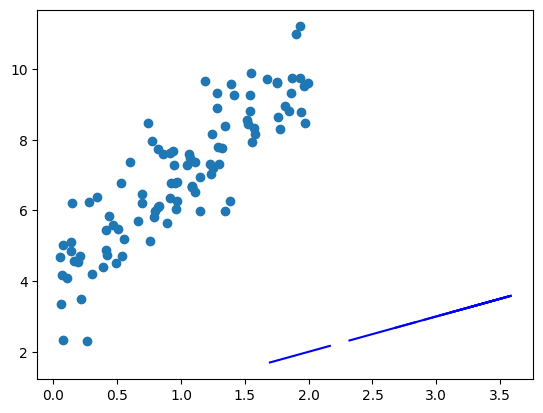

In [83]:
eta = 0.1
n_iterations = 10
m = 100

theta = np.random.randn(2, 1)

fig = plt.subplot()
fig.scatter(x=X, y=y)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    fig.plot(theta, theta, 'b-')

In [38]:
theta

array([[4.04566355],
       [2.9352078 ]])

In [84]:
n_epochs = 50

t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [85]:
theta

array([[4.02264102],
       [2.9619649 ]])